# Part 1

**Research Question:** 
- Are vaccination rates responsive to the growth rate of a COVID-19 outbreak?

**Substantive Importance:** 
- 33% of eligible Americans remain unvaccinated as of 11/8/21. These vaccine hesitant people have different 

**Overall Approach & Methodology:** 
- Compare the correlation between covid case growth rates over time and the corresponding vaccination growth rate at that time
- Split these observations on different variables of interest (political leaning, Social Vulnerability Index)

In [100]:
from libraries import * # Import libraries from libraries.py
from import_data import * # Import data from import_data.py
from global_variables import * # Import global variables from global_variables.py
from plotting_functions import * # Import plotting functions from plotting_functions.py

# Read in output data from cleaning script. Set date to datetime dtype
df_joined_cases = pd.read_csv(os.getcwd().split('API-201Z')[0] + 'API-201Z/Data Sources/cleaned_joined_states.csv')
df_joined_cases['date'] = pd.to_datetime(df_joined_cases['date'])


Look at caserates nationwide to select time window of interest

Text(0.5, 1.05, 'Case Growth Since Vaccine Rollout')

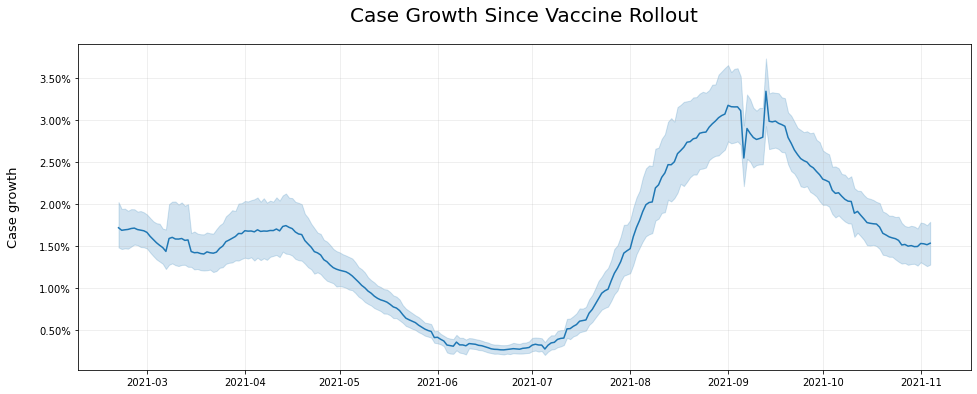

In [101]:
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(
    data=df_joined_cases,
    x='date',
    y='WoW_%_cases'
)
ax.grid(True, which='both', axis='both', alpha=0.25)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('Case growth\n', fontsize=13)
plt.xlabel(None)
plt.title('Case Growth Since Vaccine Rollout', fontsize=20, y=1.05)

We select July 8th through September 1st as the best timeframe to analyze to answer our research question for the following reasons:
1. By July, virtually all remaining unvaccinated people can be considered 'vaccine hesitant' given that they've had ample time to receive the vaccine after eligibility opened to all adults in all states, and supply issues from earlier in the rollout have mostly been resolved
2. Cases were increasing at a rapid rate nationwide during this time period (the 4th Wave). Although the 4th Wave continues past September 1st, we find there's a different relationship between case rate and vaccination rate when cases are increasing vs decreasing. We analyze the downslope of the 4th Wave separately in the second half of this report

## First Half of 4th Wave (Cases Growth Rate Increasing: July 8 - Sept 1)

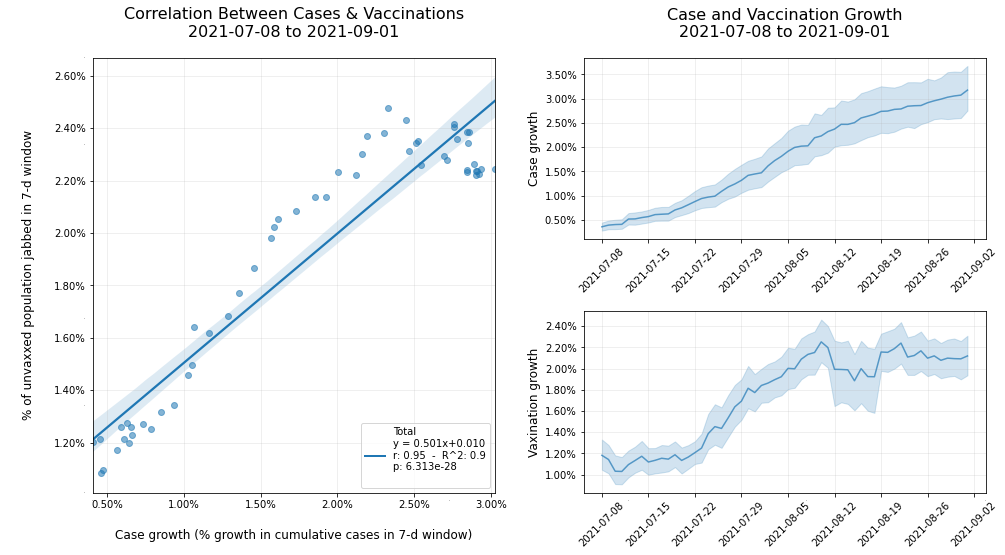

In [102]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'tab:blue'},
    start="2021-07-08", 
    end="2021-09-01"
) 

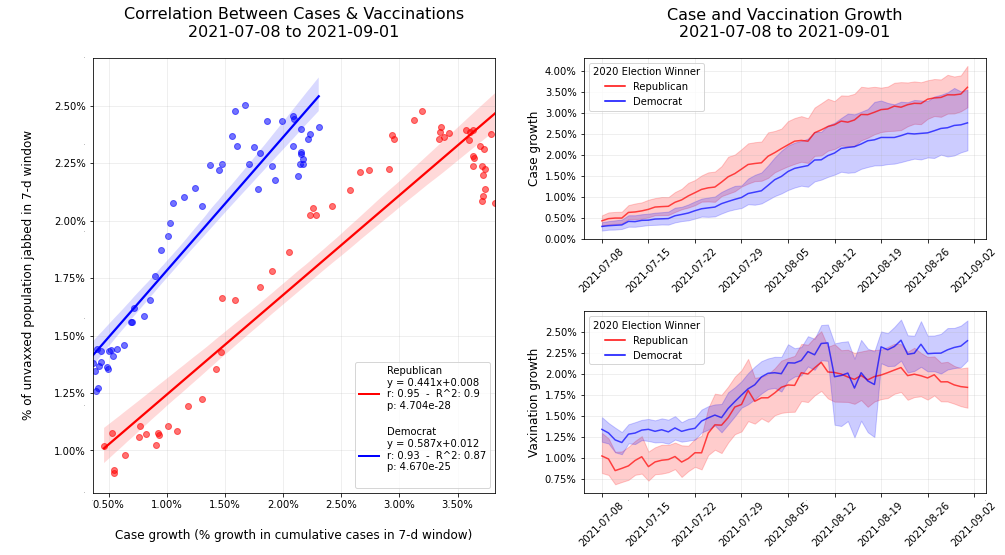

In [103]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Republican':'red', 'Democrat':'blue'},
    start="2021-07-08", 
    end="2021-09-01"
) 

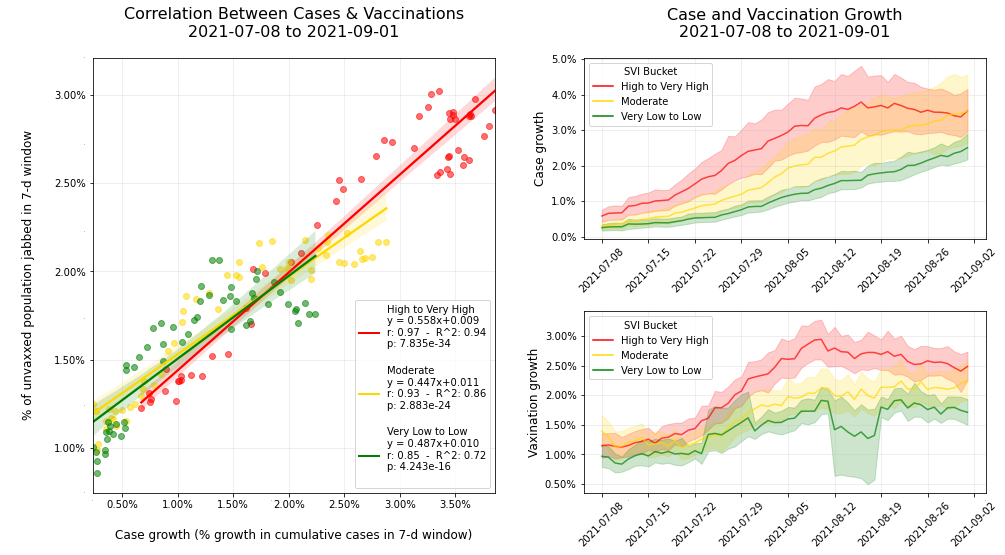

In [104]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-08", 
    end="2021-09-01"
) 

### Regression Table Overall (First Half of 4th Wave)

In [105]:
regression_table(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'gray'},
    start="2021-07-08", 
    end="2021-09-01"
)

### Regression Table for Election Winner (First Half of 4th Wave)

In [106]:
regression_table(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Democrat':'blue', 'Republican':'red'},
    start="2021-07-08", 
    end="2021-09-01"
) 

### Regression Table for SVI Bucket (First Half of 4th Wave)

In [107]:
regression_table(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-08", 
    end="2021-09-01"
) 

## Full 4th Wave (July 8 - Oct 21)

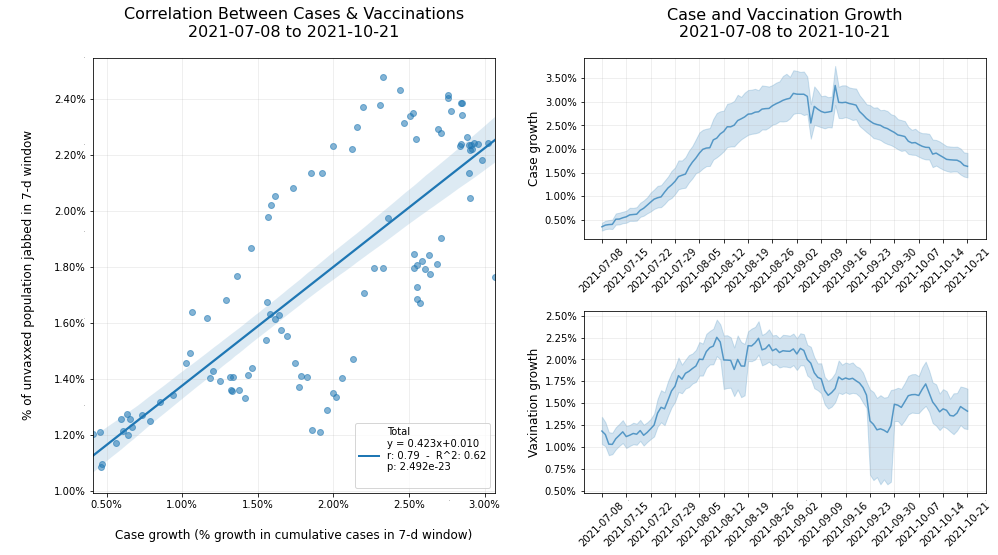

In [108]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'tab:blue'},
    start="2021-07-08", 
    end="2021-10-21"
) 

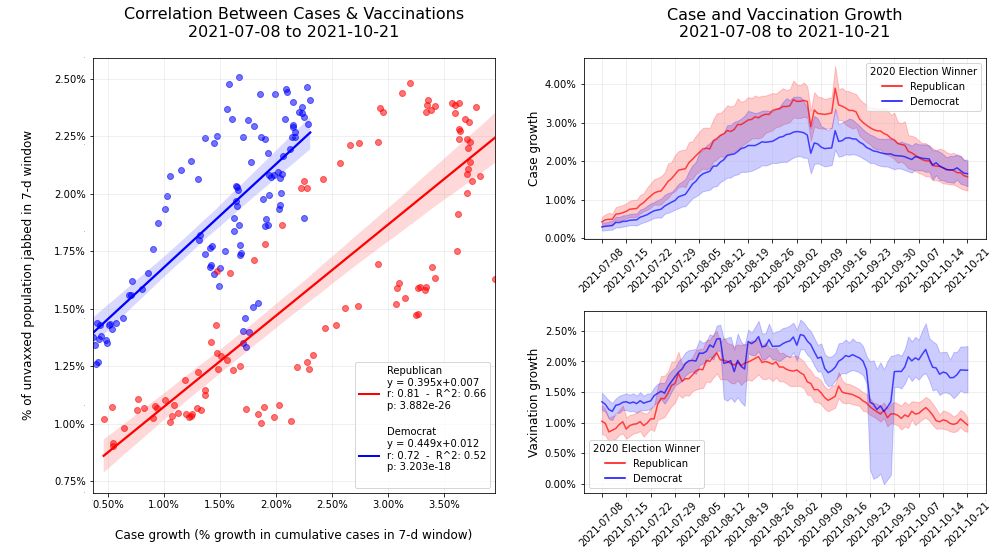

In [109]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Republican':'red', 'Democrat':'blue'},
    start="2021-07-08", 
    end="2021-10-21"
) 

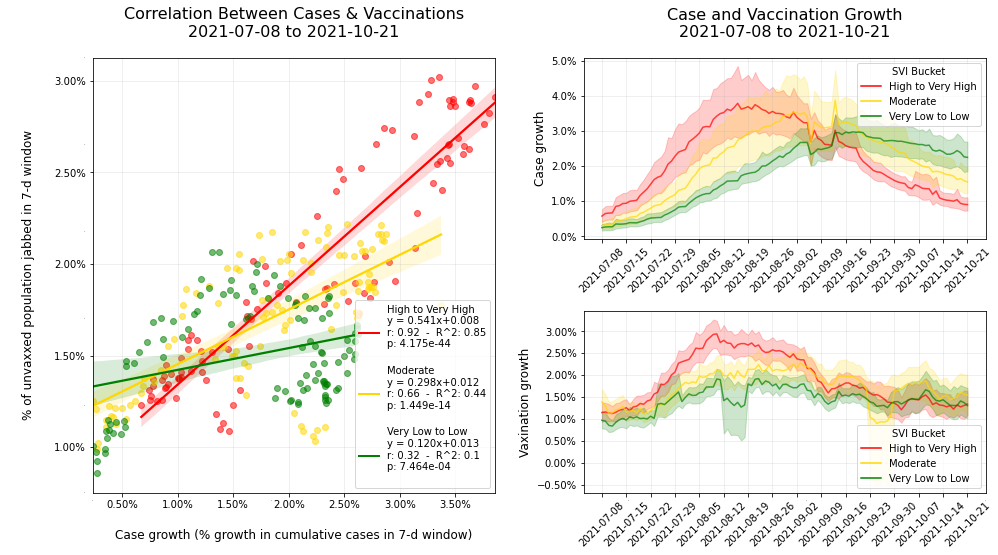

In [110]:
vax_cases_and_correlation(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-08", 
    end="2021-10-21"
) 

### Regression Table Overall (Full 4th Wave)

In [111]:
regression_table(
    data=df_joined_cases, 
    groupby=None,
    hue_levels={'Total':'tab:blue'},
    start="2021-07-08", 
    end="2021-10-21"
) 

### Regression Table for Election Winner (Full 4th Wave)

In [112]:
regression_table(
    data=df_joined_cases, 
    groupby='2020 Election Winner',
    hue_levels={'Republican':'red', 'Democrat':'blue'},
    start="2021-07-08", 
    end="2021-10-21"
) 

### Regression Table for SVI Bucket (Full 4th Wave)

In [113]:
regression_table(
    data=df_joined_cases, 
    groupby='SVI Bucket', 
    hue_levels={'High to Very High':'red', 'Moderate':'gold', 'Very Low to Low':'green'},
    start="2021-07-08", 
    end="2021-10-21"
) 

Text(0.5, 1.03, 'Correlations Between Cases and Vaccinations by State: 2021-07-08 to 2021-09-01')

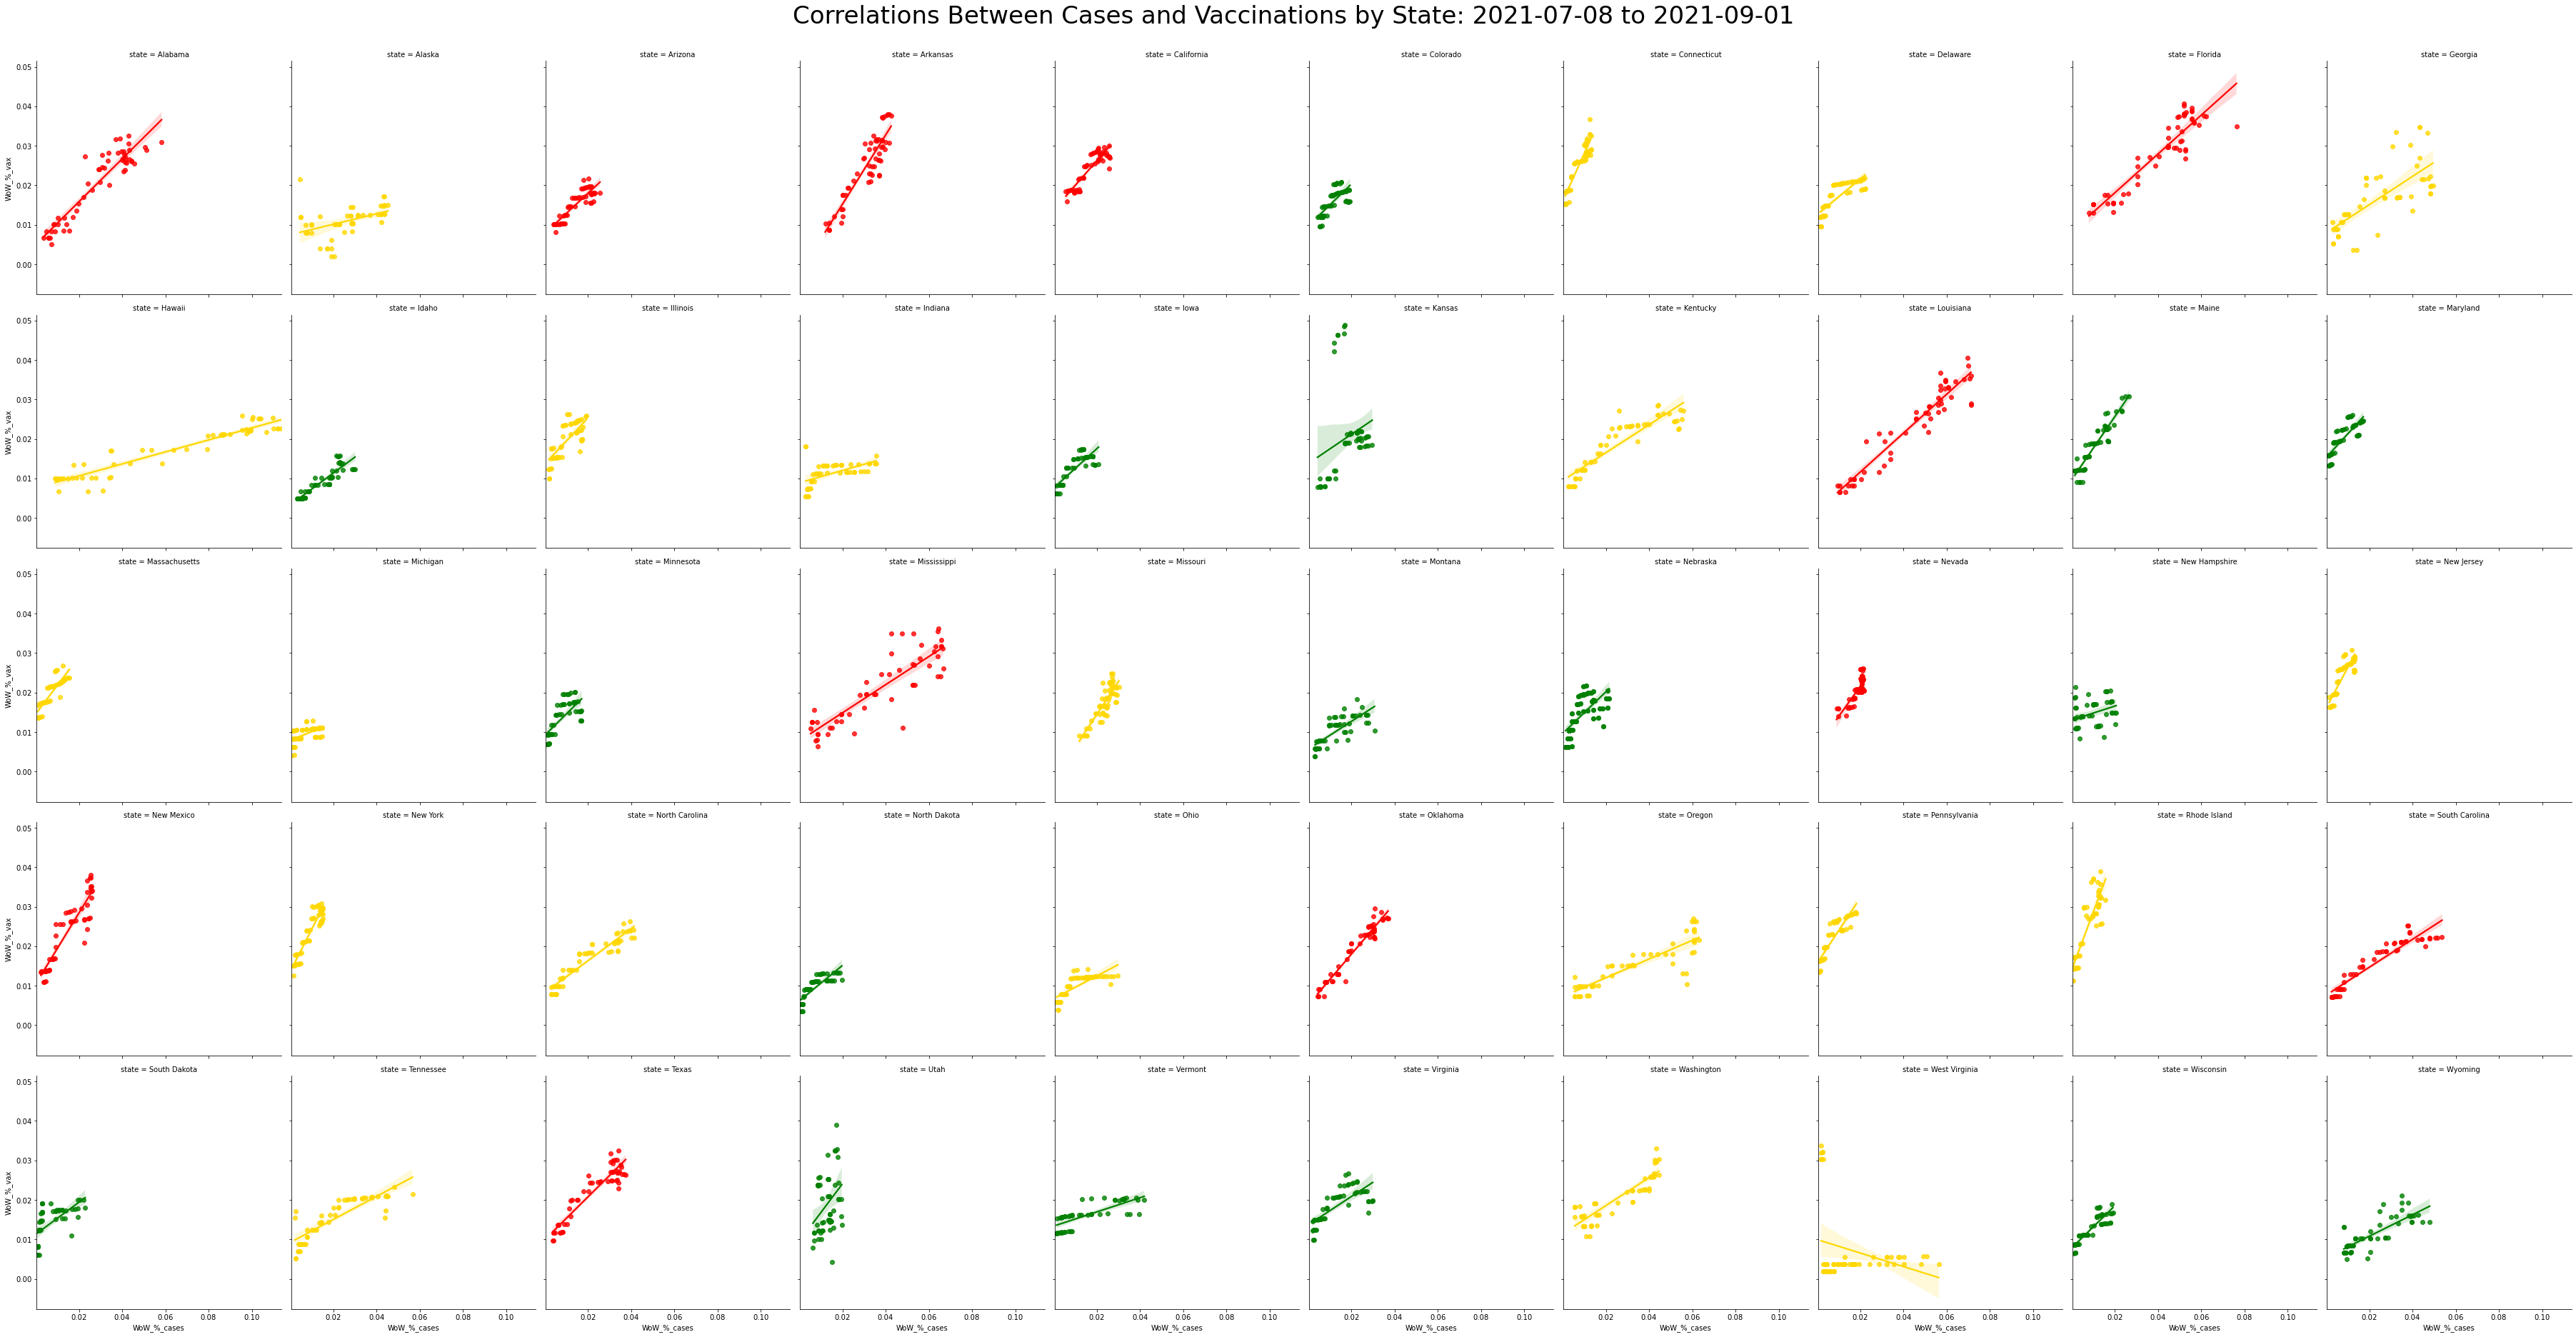

In [114]:
sns.lmplot(
    data=df_joined_cases.query('"2021-07-08" <= date <= "2021-09-01" & `WoW_%_vax` >= 0 & state != "District of Columbia"'),
    x='WoW_%_cases',
    y='WoW_%_vax',
    col='state',
    col_wrap=10,
    sharey=True,
    sharex=True,
    hue='SVI Bucket',
    hue_order=['High to Very High', 'Moderate', 'Very Low to Low'],
    palette=['red','gold','green'],
    legend=False
)
plt.suptitle("Correlations Between Cases and Vaccinations by State: 2021-07-08 to 2021-09-01", fontsize=34, y=1.03)


In [115]:
# Create a dataframe of regression results for all states
linreg_results = []
time_window = ("2021-07-08", "2021-09-01")
for state in list(df_joined_cases['state'].unique()):        
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        df_joined_cases[(df_joined_cases['state'] == state) & (df_joined_cases['date'] >= time_window[0]) & (df_joined_cases['date'] < time_window[1])]['WoW_%_cases'],
        df_joined_cases[(df_joined_cases['state'] == state) & (df_joined_cases['date'] >= time_window[0]) & (df_joined_cases['date'] < time_window[1])]['WoW_%_vax']
        )    
    linreg_results.append(
        (
        state, 
        round(slope, 3), 
        round(intercept, 3), 
        round(r_value, 3), 
        round(r_value ** 2, 3), 
        '{:0.3e}'.format(p_value)
        )
    )

linreg_by_state = pd.DataFrame(
    linreg_results,
    columns=['state','slope','intercept','r','r_squared','p_value']
).merge(pd.DataFrame(df_joined_cases.groupby('state')['SVI Bucket','2020 Election Winner'].max().reset_index()), on='state')

linreg_by_state.sort_values(['slope','r'], ascending=[False, False])



,state,slope,intercept,r,r_squared,p_value,SVI Bucket,2020 Election Winner
39,Rhode Island,1.458,0.014,0.875,0.766,2.361e-18,Moderate,Democrat
6,Connecticut,1.183,0.016,0.934,0.872,2.481e-25,Moderate,Democrat
32,New York,1.093,0.013,0.936,0.876,1.056e-25,Moderate,Democrat
30,New Jersey,1.026,0.016,0.875,0.766,2.453e-18,Moderate,Democrat
31,New Mexico,0.901,0.010,0.921,0.848,2.366e-23,High to Very High,Democrat
3,Arkansas,0.880,-0.002,0.912,0.832,3.328e-22,High to Very High,Republican
38,Pennsylvania,0.841,0.016,0.905,0.818,2.818e-21,Moderate,Democrat
44,Utah,0.831,0.008,0.397,0.158,2.662e-03,Very Low to Low,Republican
25,Missouri,0.824,-0.002,0.834,0.696,2.564e-15,Moderate,Republican
19,Maine,0.803,0.010,0.931,0.867,7.577e-25,Very Low to Low,Democrat
